In [1]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

2023-04-16 23:20:27.143324: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.models import load_model


In [3]:
binarydf = pd.read_csv('dataset/traindata.csv', index_col = 0)
multidf = pd.read_csv('dataset/traindata.csv', index_col = 0)

In [4]:
binarydf['target'].replace(['normal.','buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
train = binarydf.select_dtypes(exclude=[np.number])
print(train.columns)
for feature in train.columns:
    binarydf[feature] = LabelEncoder().fit_transform(binarydf[feature])

Index(['protocol_type', 'service', 'flag'], dtype='object')


In [7]:
test = multidf.select_dtypes(exclude=[np.number])
print(test.columns)
for feature in test.columns:
    multidf[feature] = LabelEncoder().fit_transform(multidf[feature])

Index(['protocol_type', 'service', 'flag', 'target'], dtype='object')


In [8]:
trainD = binarydf.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.05))
testD = multidf.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.07))


In [9]:
X = trainD.iloc[:,0:41]
Y = trainD.iloc[:,41]
C = testD.iloc[:,41]
T = testD.iloc[:,0:41]

In [10]:
trainX = np.array(X)
testT = np.array(T)

trainX.astype(float)
testT.astype(float)

scaler = Normalizer().fit(trainX)
trainX = scaler.transform(trainX)

scaler = Normalizer().fit(testT)
testT = scaler.transform(testT)

y_train = np.array(Y)
y_test1 = np.array(C)

y_test= to_categorical(y_test1)


X_train = np.array(trainX)
X_test = np.array(testT)

In [11]:
model = load_model('DNN/Multiclass_kddresults/dnn1layer/dnn1layer_model.hdf5')


2023-04-16 23:20:58.890659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
history=model.fit(X_test,y_test,epochs=5,validation_split=0.2, batch_size=10)


Epoch 1/5
2767/2767 [==============================] - 22s 7ms/step - loss: 0.0168 - accuracy: 0.9968 - val_loss: 0.0401 - val_accuracy: 0.9889
Epoch 2/5
2767/2767 [==============================] - 23s 8ms/step - loss: 0.0110 - accuracy: 0.9971 - val_loss: 0.0736 - val_accuracy: 0.9879
Epoch 3/5
2767/2767 [==============================] - 22s 8ms/step - loss: 0.0098 - accuracy: 0.9975 - val_loss: 0.0963 - val_accuracy: 0.9805
Epoch 4/5
2767/2767 [==============================] - 21s 7ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.1180 - val_accuracy: 0.9808
Epoch 5/5
2767/2767 [==============================] - 20s 7ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.1562 - val_accuracy: 0.9802


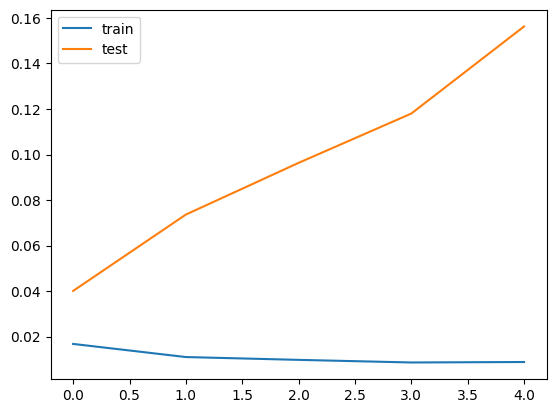

In [13]:
# plot testing history
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [14]:
model = load_model('DNN/Multiclass_kddresults/dnn2layer/dnn2layer_model.hdf5')
history=model.fit(X_test,y_test,epochs=5,validation_split=0.2, batch_size=10)


Epoch 1/5
2767/2767 [==============================] - 100s 35ms/step - loss: 0.0196 - accuracy: 0.9967 - val_loss: 0.0641 - val_accuracy: 0.9847
Epoch 2/5
2767/2767 [==============================] - 91s 33ms/step - loss: 0.0115 - accuracy: 0.9972 - val_loss: 0.0830 - val_accuracy: 0.9844
Epoch 3/5
2767/2767 [==============================] - 70s 25ms/step - loss: 0.0109 - accuracy: 0.9976 - val_loss: 0.1968 - val_accuracy: 0.9795
Epoch 4/5
2767/2767 [==============================] - 70s 25ms/step - loss: 0.0092 - accuracy: 0.9978 - val_loss: 0.1542 - val_accuracy: 0.9793
Epoch 5/5
2767/2767 [==============================] - 68s 25ms/step - loss: 0.0083 - accuracy: 0.9978 - val_loss: 0.1537 - val_accuracy: 0.9793


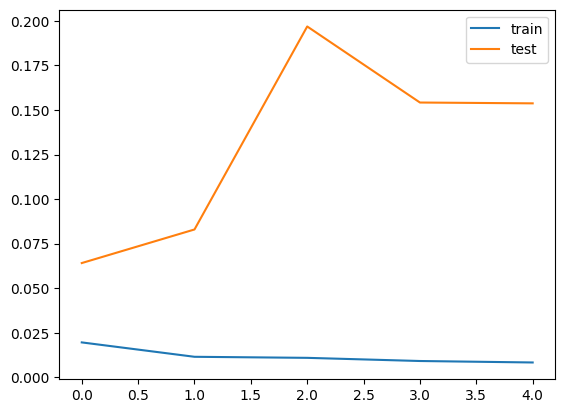

In [15]:
# plot testing history
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [16]:
model = load_model('DNN/Multiclass_kddresults/dnn3layer/dnn3layer_model.hdf5')
history=model.fit(X_test,y_test,epochs=5,validation_split=0.2, batch_size=10)


Epoch 1/5
2767/2767 [==============================] - 93s 33ms/step - loss: 0.0256 - accuracy: 0.9960 - val_loss: 0.1202 - val_accuracy: 0.9798
Epoch 2/5
2767/2767 [==============================] - 96s 35ms/step - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.2432 - val_accuracy: 0.9795
Epoch 3/5
2767/2767 [==============================] - 90s 33ms/step - loss: 0.0154 - accuracy: 0.9966 - val_loss: 0.1946 - val_accuracy: 0.9795
Epoch 4/5
2767/2767 [==============================] - 95s 34ms/step - loss: 0.0114 - accuracy: 0.9973 - val_loss: 0.1952 - val_accuracy: 0.9796
Epoch 5/5
2767/2767 [==============================] - 88s 32ms/step - loss: 0.0124 - accuracy: 0.9970 - val_loss: 0.2235 - val_accuracy: 0.9793


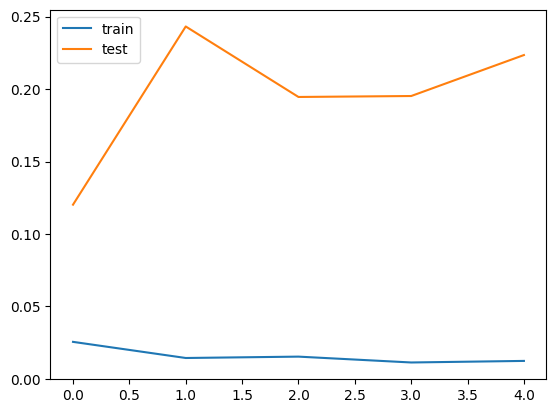

In [17]:
# plot testing history
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [19]:
model = load_model('DNN/Multiclass_kddresults/dnn4layer/dnn4layer_model.hdf5')
history=model.fit(X_test,y_test,epochs=5,validation_split=0.2, batch_size=10)


Epoch 1/5
2767/2767 [==============================] - 69s 24ms/step - loss: 0.0338 - accuracy: 0.9958 - val_loss: 0.1362 - val_accuracy: 0.9796
Epoch 2/5
2767/2767 [==============================] - 62s 22ms/step - loss: 0.0178 - accuracy: 0.9965 - val_loss: 0.1359 - val_accuracy: 0.9795
Epoch 3/5
2767/2767 [==============================] - 63s 23ms/step - loss: 0.0177 - accuracy: 0.9967 - val_loss: 0.1274 - val_accuracy: 0.9796
Epoch 4/5
2767/2767 [==============================] - 82s 29ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 0.2397 - val_accuracy: 0.9796
Epoch 5/5
2767/2767 [==============================] - 61s 22ms/step - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.2913 - val_accuracy: 0.9793


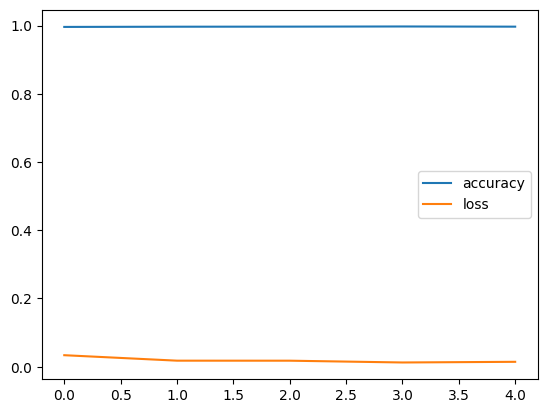

In [20]:
# plot testing history
from matplotlib import pyplot 
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['loss'], label='loss')
pyplot.legend()
pyplot.show()